# Programming for Data Analysis

## Project
<br/>

#### Lecturer: Brian McGinley

#### Student: Damien Connolly

#### Student number: G00340321
<br/>

**************************************************************************************************************************

#### Introduction

The aim of this project is to create a dataset by simulating a real-world phenomenon. It was important when selecting a database to ensure the dataset created can be measured and created using the numpy random package. 


### Task:
Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

Investigate the types of variables involved, their likely distributions, and their relationships with each other.

Synthesise/simulate a data set as closely matching their properties as possible.

Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
****************************************************************************************************************************
<br/>

I have chosen to simulate data about homeless persons in Ireland between the ages 15 - 64. I have chosen the following variables:

* Gender

* Age

* Location

* Accomodation Type

The statistics used in this project can be found here: https://www.cso.ie/en/releasesandpublications/ep/p-cp5hpi/cp5hpi/hpi/

*****************************************************************************************************************************

The Central Statistics Office (CSO) is Ireland's national statistical office and its purpose is to impartially collect, analyse and make available statistics about Ireland’s people, society and economy. At national level, CSO official statistics inform decision making across a range of areas including construction, health, welfare, the environment and the economy. At European level they provide an accurate picture of Ireland’s economic and social performance and enable comparisons between Ireland and other countries [1]. 

The homeless persons in Ireland stats used for this project are taken from the 2016 census. Of the 4,761,865 persons enumerated in the State on Census Night, April 24 2016, 6,906 were either counted in accommodation providing shelter for homeless persons or were identified sleeping rough [1]. 





In [1]:
# Import libraries used in this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Magic command to ensure that plots render inline [https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline]
%matplotlib inline

# Set seaborn style
# Use darkplot plot style for contrast
sns.set_style("darkgrid")
# Set the default colour palette
sns.set_palette("colorblind")

In [2]:
# Create empty dataframe
#df = pd.DataFrame()

### Variables
***************************************************************************************************************************

#### Gender

According to the figures 6,906 people in total were counted to be homeless on census night in 2016. Males accounted for 4,018 of those people while the total number of females was 2,888 [1]. 

For the purpose of this project we will be looking at people between the ages of 15 and 64. The age profile statistics provided allow us to remove the people outside of the specified age range easily. The total number of people between the ages 15 - 64 to be simulated will be 4,969. This includes 2,980 males and 1,989 females, meaning males account for approximately 60% and females 40%.  

In order to simulate an accurate number of both genders I have decided to use the numpy.random.choice function. This allows us to distribute the data to match the real world and it also can return a string which is useful when there are no numerical values involved. 

In [3]:
# Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

# Define the gender variables
choice = ["Male", "Female"]

# Simulate the gender
gender = np.random.choice(choice, 4969, p=[0.5997, 0.4003])


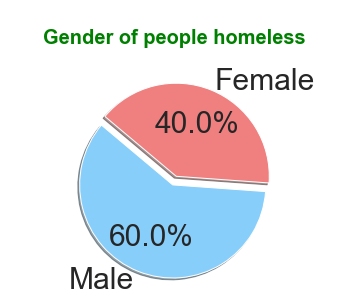

In [4]:
# Visualise the data

# Adapted from: https://pythonspot.com/matplotlib-pie-chart/ 

# Data to plot
labels = 'Male', 'Female'
slices_gender = [0.5997, 0.4003]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(slices_gender, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 30})
plt.title("\nGender of people homeless\n", fontweight="bold", fontsize="20", color="g")

plt.axis('equal')
plt.show()

In [5]:
# Create dataset by adding Gender
df = pd.DataFrame(data={"Gender": gender})
df

,Gender
0,Male
1,Female
2,Male
3,Female
4,Female
...,...
4964,Male
4965,Male
4966,Female
4967,Male


#### Age Group

According to the CSO, the homeless population tended to be younger than the general population. The average age of a homeless person was 30.5 years compared to the higher 37.4 average age for the general population. There were 4,464 homeless persons in the age group 20-59, accounting for 64.6 per cent of the total homeless count. The corresponding proportion for the overall population of the State was 54.1 per cent. The average age for females was 26.8 years compared with the higher 33.2 years for males. This contrasted with the general population where the average female age was 38.0 years compared with the lower average age of 36.7 years for males [1].


In [6]:
# View age data
agefile = pd.read_excel("ageStatsTotal.xlsx")
agefile

,Age-group,Male,Female,Total
0,0-4,379,386,765
1,5-9,292,273,565
2,10-14,190,174,364
3,15-19,165,170,335
4,20-24,286,335,621
5,25-29,355,375,730
6,30-34,381,297,678
7,35-39,436,263,699
8,40-44,384,198,582
9,45-49,348,151,499


In [7]:
# Remove final total row for plotting purposes
af = agefile.drop([16])

Text(0.5, 1.0, 'Distribution of Ages')

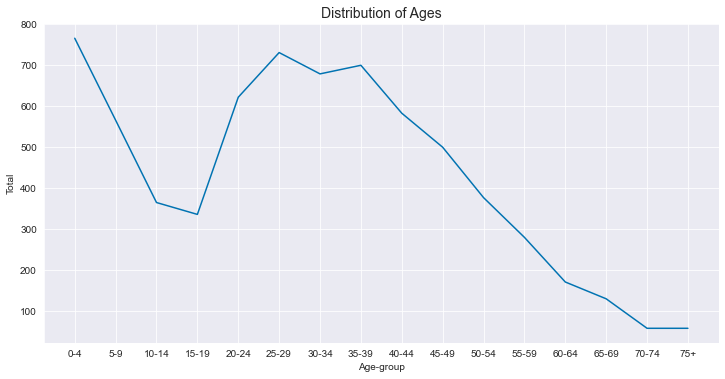

In [8]:
# Plot the total to visualise the age distribution
sns.relplot(x="Age-group", y="Total", kind="line", data=af, height=5, aspect=2) # Use aspect to make plot wider
plt.xlabel('Age-group')
plt.ylabel('Total')
plt.title('Distribution of Ages', fontsize=14)

As stated we are looking at people within the age range 15 - 64. By looking at the distribution starting from the age of 15 up to 64 the plot seems likely that it could be replicated using a triangular distribution. The triangular distribution is a continuous probability distribution with lower limit left, peak at mode, and upper limit right [2]. It should be possible to simulate the distribution using these parameters.

* Lower limit: The Starting point of the triangle. We will be starting from 15.


* Mode: The highest frequency i.e. the age with the greatest proportion of the population. From the stats we can see that the age-range 24 - 29 has the highest number of males and females combined accounting for 730. So for the purpose of this project I will set the mode to 27. 


* Upper limit: The Ending point of the triangle. 64 in this case.

In [20]:
# Simulate ages

# Set the seed
np.random.seed(1)

# Set the parameters and generate ages using the triangular distribution
age = np.random.triangular(15, 27, 64, 4969)

# Print the min, max and median age generated from the array
print("The minimum age is :", min(age),"\nThe maximum age is :", max(age),"\nThe median age is  :", np.median(age))

The minimum age is : 15.238761396278328 
The maximum age is : 63.52545060545586 
The median age is  : 33.97701892414525


Text(0.5, 1.0, 'Distribution of Ages')

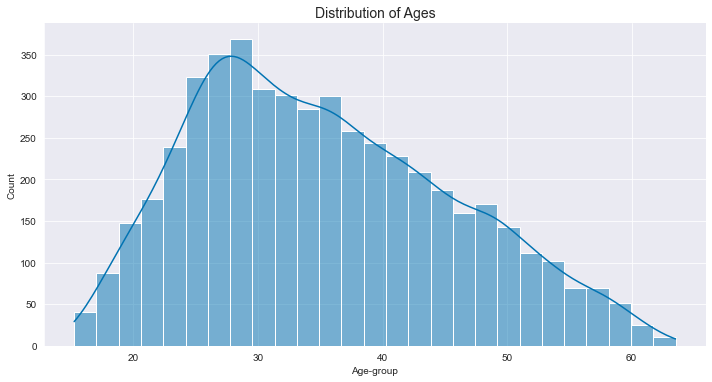

In [21]:
# Plot distribution
sns.displot(kde="line", data=age, aspect = 2)
plt.xlabel('Age-group')
plt.ylabel('Count')
plt.title('Distribution of Ages', fontsize=14)

The distribution created above looks fairly similar to the original distribution. This array currently contains floats, I can easily round them off to their nearest integer using np.rint. 

In [22]:
# Round off to nearest integer
fAge = np.rint(age)

# Print the min, max and median age generated from the array
print("The minimum age is :", min(fAge),"\nThe maximum age is :", max(fAge),"\nThe median age is  :", np.median(fAge))

The minimum age is : 15.0 
The maximum age is : 64.0 
The median age is  : 34.0


In [23]:
# Add Age to the dataframe
df['Age'] = fAge

In [24]:
# View dataframe
df

,Gender,Age,Location,Accomodation Type
0,Male,31.0,Dublin,In Accomodation
1,Female,41.0,Dublin,In Accomodation
2,Male,15.0,Dublin,In Accomodation
3,Female,28.0,Dublin,In Accomodation
4,Female,24.0,Dublin,In Accomodation
...,...,...,...,...
4964,Male,40.0,Dublin,In Accomodation
4965,Male,51.0,Dublin,In Accomodation
4966,Female,28.0,Mid West,In Accomodation
4967,Male,54.0,Dublin,In Accomodation


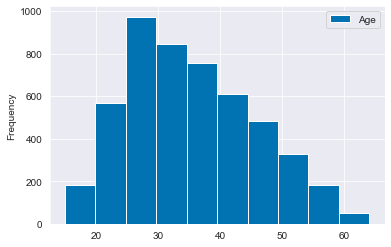

In [28]:
df.plot(x='Gender', y='Age', kind="hist")

#### Location

The table below shows the distribution of homeless persons by region. The results show that 72.5 per cent of the persons enumerated as part of the homeless count were covered by the Dublin region on Census Night. Of the 5,009 people enumerated as part of the Dublin region, 55.9 per cent or 2,802 were male. The next largest region was the South West. Of the 471 homeless persons enumerated in this region, 285 were male.

In [29]:
# View location data
ls = pd.read_csv("location.stats.csv")
ls

,Region,Male,Female,Total
0,Dublin,2802,2207,5009
1,South West,285,186,471
2,Mid West,265,131,396
3,South East,203,120,323
4,Mid East,163,68,231
5,West,119,70,189
6,North East,100,53,153
7,Midland,50,44,94
8,North West,31,9,40
9,Total,4018,2888,6906


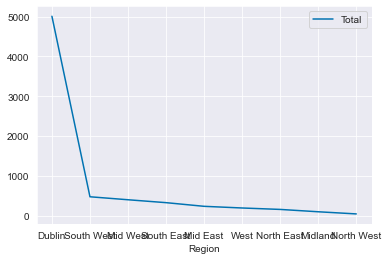

In [30]:
# Drop row 9 (Total) for plotting 
locStat = ls.drop([9])

# Create plot
locStat.plot(x='Region', y='Total', kind = 'line')

From the distribution it is clear to see that Dublin contains the majority of the homeless people at 72.5%. This distribution could be difficult to replicate due to such a big fall off to the rest of the regions. In order to simulate this data I will use the numpy.random.choice function and select items from a list based on the correct probability. Numpy.random.choice takes an array as a parameter and randomly returns one of its values, it can also be used to return multiple values. This is uselful when you want to choose multiple items from a particular list [3].  

In [31]:
# Set the location variables
location = ['Dublin', 'South West', 'Mid West', 'South East', 'Mid East', 'West', 'North East', 'Midlands', 'North West']
# Set the parameters and generate array with locations
loc = np.random.choice(location, 4969, p=[0.7253, 0.0682, 0.0573, 0.0467, 0.0334, 0.0274, 0.0222, 0.0137, 0.0058])
# Add location to dataframe
df['Location'] = loc
# View dataframe
df

,Gender,Age,Location,Accomodation Type
0,Male,31.0,South East,In Accomodation
1,Female,41.0,Dublin,In Accomodation
2,Male,15.0,Dublin,In Accomodation
3,Female,28.0,Dublin,In Accomodation
4,Female,24.0,West,In Accomodation
...,...,...,...,...
4964,Male,40.0,Dublin,In Accomodation
4965,Male,51.0,South East,In Accomodation
4966,Female,28.0,Dublin,In Accomodation
4967,Male,54.0,South East,In Accomodation


#### Accomodation Type

Homeless persons were identified based on where they were on Census Night rather than by self-identification. This means that people in Long Term Accommodation (LTA) are excluded from the main results in this report, an approach agreed in advance with all the major stakeholders working in the area of homelessness [1]. In this report people are divided into two categories, Sleeping in accomodation or Sleeping rough. 


In [32]:
# View accomodation data
accType = pd.read_excel("AccomodationType.xlsx")
accType

,Category,Male,Female,Total
0,Persons in accommodation,3914,2869,6783
1,Persons sleeping rough,104,19,123
2,Total,4018,2888,6906


From the table above it is clear to see that males account for most of the rough sleepers. Of the 123 that were included in the report 104 were male while only 19 were female. In order to replicate this data I have decided to use the numpy.random.choice function and try simulate the data using the correct probability for each gender.  

In [37]:
type = ['In Accomodation', 'Sleeping Rough']

for idx, val in enumerate(df.itertuples()):
    if df.Gender[idx] == "Male":
            df.loc[idx, 'AccomodationType'] = np.random.choice(type, p=[0.9740, 0.0260]) 
    elif df.Gender[idx] == "Female":
            df.loc[idx, 'AccomodationType'] = np.random.choice(type, p=[0.9934, 0.0066]) 


In [42]:
df

,Gender,Age,Location,Accomodation Type,AccomodationType
0,Male,31.0,South East,In Accomodation,In Accomodation
1,Female,41.0,Dublin,In Accomodation,In Accomodation
2,Male,15.0,Dublin,In Accomodation,In Accomodation
3,Female,28.0,Dublin,In Accomodation,In Accomodation
4,Female,24.0,West,In Accomodation,In Accomodation
...,...,...,...,...,...
4964,Male,40.0,Dublin,In Accomodation,In Accomodation
4965,Male,51.0,South East,In Accomodation,In Accomodation
4966,Female,28.0,Dublin,In Accomodation,In Accomodation
4967,Male,54.0,South East,In Accomodation,In Accomodation
